In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train = datasets.KMNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.KMNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
train_set = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [9]:
for data in train_set:
  print(data)
  break

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.4980, 0.0157, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.9922, 0.1765, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

In [18]:
x = data[0][0]
y = data[1][9]

print(y)

tensor(9)


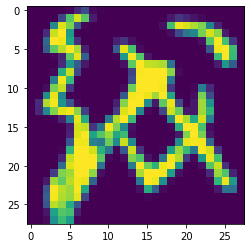

In [19]:
plt.imshow(data[0][9].view(28,28))

**Creation of Neural Network using python class.**

In [20]:
class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 128)
    self.fc5 = nn.Linear(128, 20)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return F.log_softmax(x, dim = 1)


model = Model()
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=20, bias=True)
)


**x_input means contain the datas that is to be entered into the neural network**

In [21]:
x_input = torch.rand(28,28)

In [23]:
x_input = x_input.view(-1, 28*28)

**output means output given by the neural network**

In [24]:
output = model(x_input)

In [25]:
output

tensor([[-3.0021, -3.0165, -2.9903, -2.9753, -2.9732, -3.0096, -3.0768, -3.0041,
         -3.0398, -2.9410, -2.9555, -3.0015, -2.9506, -3.0616, -2.9875, -2.9991,
         -2.9878, -2.9085, -3.0212, -3.0279]], grad_fn=<LogSoftmaxBackward>)

**Calculation of loss and Adam optimizer is used to optimize the model.**

In [27]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)

EPOCHS = 4

for epoch in range(EPOCHS):
  for data in train_set:
    x_input, y = data
    model.zero_grad()
    output = model(x_input.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)



tensor(0.2646, grad_fn=<NllLossBackward>)
tensor(0.1386, grad_fn=<NllLossBackward>)
tensor(0.7952, grad_fn=<NllLossBackward>)
tensor(0.0030, grad_fn=<NllLossBackward>)


**Calculation of Accuracy**

In [28]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_set:
    x_input, y = data
    output = model(x_input.view(-1, 28*28))

    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

  print(correct, total)

58691 60000


In [30]:
Accuracy = correct/total *100
Accuracy

97.81833333333333

In [32]:
x_input

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

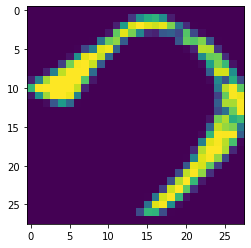

In [35]:
plt.imshow(x_input[9].view(28,28))

In [38]:
torch.argmax(model(x_input[9].view(-1,28*28))[0])

tensor(3)

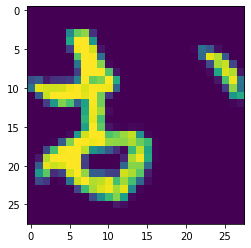

In [44]:
plt.imshow(x_input[2].view(28,28))

In [43]:
torch.argmax(model(x_input[2].view(-1,28*28))[0])

tensor(0)